In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import re

### Reading and Cleaning data

Read in data from kaggle

Reference: https://www.kaggle.com/datasets/parisrohan/credit-score-classification

In [11]:
# train = pd.read_csv('./../Data/train.csv', dtype={'Age':int})
train = pd.read_csv('./../Data/train.csv')
test = pd.read_csv('./../Data/test.csv')

<ipython-input-11-97a9f0dedd64>:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('./../Data/train.csv')


Most of data columns are not in the desired type, and therefore do data cleaning.

In [12]:
train.describe(include='all')

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,90015,100000,100000,100000,100000,84998.000000,100000.000000,...,100000,100000,100000.000000,90970,100000,100000.000000,95521,100000,98800,100000
unique,100000,12500,8,10139,1788,12501,16,18940,NaN,NaN,...,4,13178,NaN,404,3,NaN,91049,7,98792,3
top,0x1602,CUS_0xd40,January,Langep,38,#F%$D@*&8,_______,36585.12,NaN,NaN,...,Standard,1360.45,NaN,15 Years and 11 Months,Yes,NaN,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,12500,44,2833,5572,7062,16,NaN,NaN,...,36479,24,NaN,446,52326,NaN,4305,25513,9,53174
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4194.170850,17.091280,...,NaN,NaN,32.285173,NaN,NaN,1403.118217,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3183.686167,117.404834,...,NaN,NaN,5.116875,NaN,NaN,8306.041270,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,303.645417,-1.000000,...,NaN,NaN,20.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1625.568229,3.000000,...,NaN,NaN,28.052567,NaN,NaN,30.306660,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3093.745000,6.000000,...,NaN,NaN,32.305784,NaN,NaN,69.249473,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5957.448333,7.000000,...,NaN,NaN,36.496663,NaN,NaN,161.224249,NaN,NaN,NaN,NaN


In [14]:
# For now I just drop NAs.
train = train.dropna()

# Transform into Numeric Columns
train.Age = train.Age.str.extract('(\d+)').astype(np.number)
train.Annual_Income = train.Annual_Income.str.extract('(\d+)').astype(np.number)
train.Outstanding_Debt = train.Outstanding_Debt.str.extract('(\d+)').astype(np.number)
train.Monthly_Balance = train.Monthly_Balance.str.extract('(\d+)').astype(np.number)
train.Amount_invested_monthly = train.Amount_invested_monthly.str.extract('(\d+)').astype(np.number)
train.Num_of_Loan = train.Num_of_Loan.str.extract('(\d+)').astype(np.number)

# Convert Year and Month into Months
train.Credit_History_Age = [int(j)*12+int(k) for [j,k] in [re.findall(r'\d+', entry) for entry in train.Credit_History_Age]]

# Clean outliers and unreasonable values
train = train[train.Age < 80]
train = train[train.Annual_Income < 200000]
train = train[train.Monthly_Balance < 10000]
train = train[train.Amount_invested_monthly < 1000]

train = train[train.Num_Bank_Accounts < 50]
train = train[train.Num_Credit_Card < 50]
train = train[train.Num_Credit_Inquiries < 50]
train = train[train.Num_of_Loan < 30]

train = train[train.Interest_Rate < 50]
train = train[train.Total_EMI_per_month < 600]

### A short summary for Data

This is a data without meta data, therefore some informations are not really clear.

After cleaning, about 2/5 data remains in the data set. In which, only 1/5 of names are unique (Customer ID / SSN as well). It infers that this data could be a data that records data for a group of people in a period of time.

When the Age is restricted to under 80, the maximum of them is 56. This is a sign that this dataset is focused on a specific group of people.

For now, I have not clue what does a negative number of delay from due date mean.

In [15]:
train.describe(include=[np.number])

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,40712.000000,40712.000000,40712.000000,40712.000000,40712.000000,40712.000000,40712.000000,40712.000000,40712.000000,40712.000000,40712.000000,40712.000000,40712.000000,40712.000000,40712.000000
mean,32.876179,47361.671571,3943.764427,5.560253,5.676189,15.293574,3.995161,22.103851,6.129814,1516.907521,32.196405,212.431298,108.859412,175.263338,381.023850
std,10.680111,36274.471452,3027.829473,2.620439,2.195882,8.898919,2.223637,15.287978,3.901828,1191.836160,5.060033,100.061903,96.196465,161.787932,193.636186
min,14.000000,7005.000000,303.645417,-1.000000,0.000000,1.000000,1.000000,-5.000000,0.000000,0.000000,20.881250,2.000000,4.462837,0.000000,0.000000
25%,24.000000,18675.000000,1564.135833,4.000000,4.000000,8.000000,2.000000,10.000000,3.000000,611.000000,28.028041,133.000000,39.832607,69.000000,264.000000
50%,33.000000,35248.000000,2937.987083,6.000000,6.000000,15.000000,4.000000,19.000000,6.000000,1250.500000,32.208778,211.000000,74.324207,122.000000,324.000000
75%,41.000000,67227.750000,5571.819375,8.000000,7.000000,21.000000,6.000000,29.000000,9.000000,2156.000000,36.391642,291.000000,152.061236,219.000000,442.000000
max,56.000000,179987.000000,15204.633333,42.000000,49.000000,34.000000,23.000000,67.000000,34.000000,4998.000000,49.564519,404.000000,596.337014,999.000000,1552.000000


In [16]:
train.describe(exclude=[np.number])

,ID,Customer_ID,Month,Name,SSN,Occupation,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
count,40712,40712,40712,40712,40712,40712,40712,40712,40712,40712,40712,40712,40712
unique,40712,10781,8,8977,10751,16,6122,376,3788,4,3,7,3
top,0x1602,CUS_0x127d,January,Deepa Seetharamanm,#F%$D@*&8,_______,Not Specified,17,_,Standard,Yes,Low_spent_Small_value_payments,Standard
freq,1,8,5223,25,2286,2832,654,2424,838,14958,23000,10529,21438


Type of loan is interesting, it could be able to use for constructing some more variables.

In [17]:
train.Type_of_Loan[0]

'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'

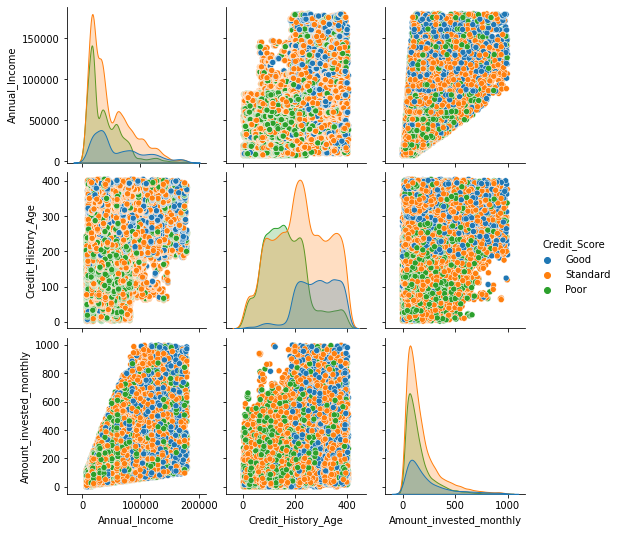

In [18]:
_ = sns.pairplot(train, hue='Credit_Score', vars=['Annual_Income', 'Credit_History_Age', 'Amount_invested_monthly'])